# Group 2A11, Penguins Group Project, PIC 16A Winter 2022
> By Joy Lee and Alex Shih

Our goal in this mini project is to determine a small set of measurements that are highly predictive of a penguin’s species and to use those measurements to construct some machine learning models. We will be working with the Palmer Penguins data set which contains measurements on three penguin species: Chinstrap, Gentoo, and Adelie.

# 1. Group Contributions Statement

>The two of us wrote the data acquisition and preparation portions together. Joy led Figure 1, wrote the explanations for each figure included in the explanatory analyses, led the Support Vector Machine Model and wrote the confusion matrices for each model. Alex wrote Figure 2, the table included in exploratory analysis, and the Logistic Regression model. Joy wrote the code to print out the training and test scores included in the Discussion and Alex wrote recommendations on how to improve our models. We worked on the plot_regions function and the cross validation score portions together. We also checked each other’s work and made revisions to code and writing.

# 2. Data Import and Cleaning

#### Some Standard Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import seaborn as sns

#### Getting the Data and Examining It

In [2]:
url = "https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv"
penguins = pd.read_csv(url)
penguins

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


#### Split the Data into Training and Testing Sets

In [3]:
from sklearn.model_selection import train_test_split

#splitting the data set
penguins = penguins[["Flipper Length (mm)", "Culmen Length (mm)", "Island", "Species"]].dropna()
X=penguins[["Flipper Length (mm)", "Culmen Length (mm)", "Island"]]
y=penguins["Species"]

#80% of the data will be used for training and 20% for testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)

#### Cleaning

In [4]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

#changing species names to numbers
y_train=le.fit_transform(y_train)
y_test=le.fit_transform(y_test)   

#change Island names to numerical values
X_train["Island"]=le.fit_transform(X_train["Island"])
X_test["Island"]=le.fit_transform(X_test["Island"])

/var/folders/gv/w3w4wwbs2591xbp621r5lkdw0000gn/T/ipykernel_26255/2896993914.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["Island"]=le.fit_transform(X_train["Island"])
/var/folders/gv/w3w4wwbs2591xbp621r5lkdw0000gn/T/ipykernel_26255/2896993914.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Island"]=le.fit_transform(X_test["Island"])


# 3. Exploratory Analysis

In this section we will compute summary statistics and construct visualizations about the relationships between different variables from the penguins data set. Includes 2 figures and 1 table.

## Figure 1. Scatterplot

Next we will use a scatterplot to visualize the relationship between Culmen Length and Flipper Length for penguins of different species.

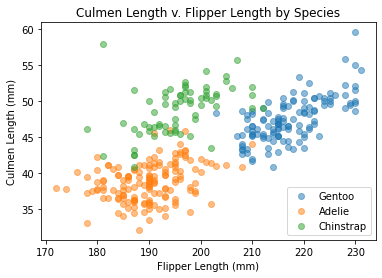

In [5]:
fig,ax = plt.subplots(1)
ax.set(xlabel="Flipper Length (mm)",
       ylabel="Culmen Length (mm)",
       title="Culmen Length v. Flipper Length by Species")

penguins["Species"]=penguins["Species"].str.split().str.get(0)
uniqueSpecies=set(penguins["Species"])

for x in uniqueSpecies: 
    test = penguins[penguins["Species"]==x]
    ax.scatter(test["Flipper Length (mm)"],
               test["Culmen Length (mm)"], 
               alpha = 0.5, 
               label = x)
ax.legend()

### Discussion of figure 1:

From our scatterplot, we can see distinct clusters of Gentoo, Chinstrap, Adelie penguins when grouped by culmen length and flipper length. Gentoo penguins tend to have longer flippers and mid-sized culmens, Adelie penguins seem to have the shortest flippers and culmens while Chinstraps have mid-length flippers and similar culmen lengths to Gentoo penguins. These distinctions suggest we may want to use these the culmen length and flipper length features as predictor variables for our models. 

Now that we have identified some distinctions when grouped by species, let's explore further differences when the species are grouped by island. 

## Figure 2. Faceted Histogram

Let’s make another figure with multiple axes to visualize the Culmen Lengths of different species where we split up the plots by species AND island. 

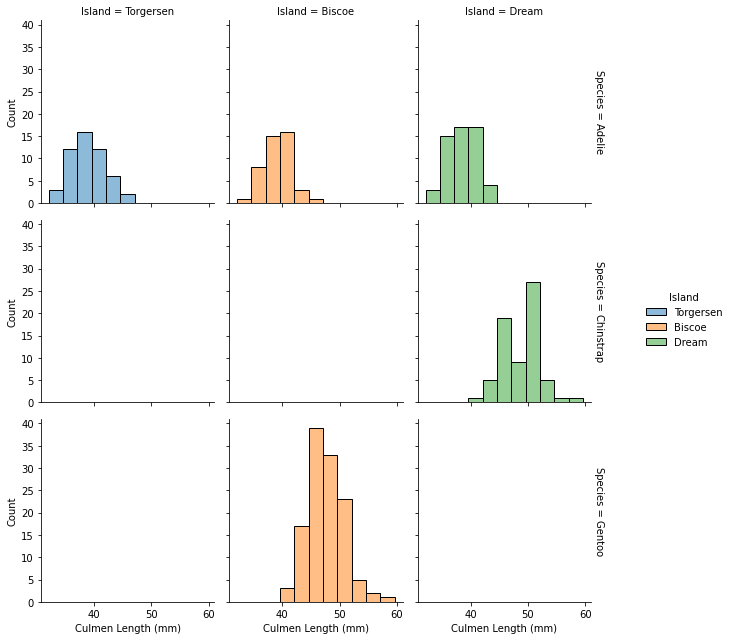

In [6]:
#histogram, body mass of each penguin grouped by island and species
penguins["Species"] = penguins["Species"].str.split().str.get(0)
plot=sns.displot(penguins, 
                 x="Culmen Length (mm)", 
                 col="Island", 
                 row="Species", 
                 hue = "Island", 
                 facet_kws=dict(margin_titles=True),
                 height = 3)

### Discusion of figure 2:

From these plots, it seems like Adelie penguins have the shortest culmen's regardless of which Island they are on. The Gentoo penguins on Biscoe island have longer culmen lengths than the Adelie on Biscoe and similarly, Chinstraps on Dream Island have longer culmens than the Adelie on Dream Island. 

This faceted histogram help us visualize the differences between species on separate islands more clearly. In particular, if we had grouped by only islands, it would have been more difficult to discern that it is the Adelie specifically whom have short culmens. We can also note that Gentoo penguins only exist on Biscoe Island and Chinstraps only exist on Dream.

## Table

Here we have summary statistics on the culmen length's of penguins from the dataset.
We used `df.groupby()` to summarize data across the qualitative Island and Species.

In [7]:
penguins[["Culmen Length (mm)", "Island", "Species"]].groupby(["Island", "Species"]).describe()

Culmen Length (mm)                                     \
                                 count       mean       std   min     25%   
Island    Species                                                           
Biscoe    Adelie                  44.0  38.975000  2.480916  34.5  37.675   
          Gentoo                 123.0  47.504878  3.081857  40.9  45.300   
Dream     Adelie                  56.0  38.501786  2.465359  32.1  36.750   
          Chinstrap               68.0  48.833824  3.339256  40.9  46.350   
Torgersen Adelie                  51.0  38.950980  3.025318  33.5  36.650   

                                          
                       50%     75%   max  
Island    Species                         
Biscoe    Adelie     38.70  40.700  45.6  
          Gentoo     47.30  49.550  59.6  
Dream     Adelie     38.55  40.375  44.1  
          Chinstrap  49.55  51.075  58.0  
Torgersen Adelie     38.90  41.100  46.0

### Discussion of Table:

This table matches our histogram from above and shows us that Adelie penguins live on all three Islands while Gentoo penguins only live on Biscoe Island and Chinstraps only live on Dream Island.

These statistic summaries also show us that Adelie penguins have average culmen lengths of around 38-39 (mm) and Gentoo and Chinstraps have average culmen lengths of 47-49 (mm). This gives us a quantitative value we can use to distinguish Adelie penguins. Although Gentoo and Chinstraps have similar culmen lengths, since we know that they exist on separate islands, we can use that information to distinguish between them.

# 4. Feature Selection
**Choosing Quantitative Variables**
   
Based on the exploratory analysis, the faceted histogram and summary table show that Adelie penguins have significantly shorter culmen lengths than Gentoo and Chinstrap penguins which makes **culmen length** a good quantitave predictor variable. Additionally, flipper length and culmen length seem to have a positive correlation with one another which is evident from the clusters in our scatterplot. These clusters indicate that penguins of the same species tend to have similar ratios for flipper and culmen lengths. Therefore we will choose **flipper length** as our second quantitative predictor variable. 

**Choosing a Qualitative Variable**

The faceted histogram and table show us that not all penguins exist on every island. Thus if we choose **island** as our qualitative feature, our models can more easily use culmen length and flipper length to predict the correct species. 

Now that we have chosen culmen length, flipper length, and Island as our predictor variables, let's train some models!

# 5. Modeling

This section uses the training and testing data from Part 2 to train machine learning models on how to predict a penguin's species given the 3 predictor variables we chose in Part 4. Then we will evaluate the models on their performance using tools such as cross-validation to choose complexity parameters, confusion matrices, and visualizations of decision regions. We will also discuss the mistakes made by each model and factors that may have contributed to those mistakes. 

### A Function to Visualize our Model's Decision Regions

In [8]:
def plot_regions(c,X,y):
    """
    Plot regions is a function that takes 3 arguments: c, an object from 
    the model class in the sklearn library and two dataframes X,y. 
    X contains our predictor variables and y has our target variable. 
    This function will then train a user-specified model type on a subset 
    of X and y to output a figure with the model's predictions. 
    """
    #train model on WHOLE data set with our chosen quantitative features 
    c.fit(X[["Flipper Length (mm)","Culmen Length (mm)"]],y)

    x0=X["Flipper Length (mm)"]
    x1=X["Culmen Length (mm)"]

    grid_x=np.linspace(x0.min(),x0.max(),501) 
    grid_y=np.linspace(x1.min(),x1.max(),501) 

    xx,yy=np.meshgrid(grid_x,grid_y)
    np.shape(xx),np.shape(yy)

    XX=xx.ravel()
    YY=yy.ravel()

    p=c.predict(np.c_[XX,YY])
    
    p=p.reshape(xx.shape)
    
    #create figure, one plot for each Island
    fig,ax=plt.subplots(1,3, figsize=(12,4))
    plt.tight_layout()
    
    #dict to get island titles
    islands={0:"Biscoe", 1:"Dream", 2:"Torgersen"}
   
    #dict for penguins names
    species={0:"Adelie", 1:"Chinstrap", 2:"Gentoo"}
    
    #dict to assign distinct colors for each species
    colors={0:"blue", 1:"limegreen", 2:"firebrick"}
    
    uniqueIsland=X["Island"].unique()
    
    for i in range(3): 
        #plot decision regions
        ax[i].contourf(xx,yy,p,cmap="jet",alpha=.2)
        
        #plot penguin points
        ax[i].scatter(x0[X["Island"] == uniqueIsland[i]],
                      x1[X["Island"] == uniqueIsland[i]],
                      c=[colors[i] for i in y[X["Island"] == uniqueIsland[i]]],
                      cmap="jet",
                      label=[species[i] for i in y[X["Island"] == uniqueIsland[i]]])
        
        #label each plot with titles, axes and a legend
        ax[i].set(title=islands[uniqueIsland[i]])
        ax[i].set(xlabel="Flipper Length (mm)",ylabel="Culmen Length (mm)")
    
        patches=[mpatches.Patch(color=colors[key],label=species[key]) for key in colors]
        fig.legend(handles=patches, bbox_to_anchor=(1.1,.6))


## Model 1. Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

### First perform cross-validation to choose the best complexity parameter for our Logistic model.

In [10]:
from sklearn.model_selection import cross_val_score

scores=[]
C_param_range = np.linspace(0.01,10,10)
best_score=-np.inf

for i in C_param_range:
    LR=LogisticRegression(C=i)
    scores.append(cross_val_score(LR,X_train,y_train,cv=5).mean())
    if scores[-1]>best_score:
        best_score=scores[-1]
        best_C=i

/Users/joylee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/joylee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

/Users/joylee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/joylee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

/Users/joylee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/joylee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

In [11]:
print(best_C, best_score)
print("\nCross validation tells us the best C (complexity) value for the Logistic \nRegression Model is "
      + str(best_C)+" which gives an average training score of "+ str(best_score)+".")

2.23 0.9672727272727272

Cross validation tells us the best C (complexity) value for the Logistic 
Regression Model is 2.23 which gives an average training score of 0.9672727272727272.


### Evaluation on Unseen Testing Data 
Using the test set, we will now create a confusion matrix to test our model on unseen data and evaluate its overall predictive power.

In [12]:
LR=LogisticRegression(C=best_C)
LR.fit(X_train,y_train)
y_test_pred=LR.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_test_pred)

/Users/joylee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[24,  0,  3],
       [ 5, 13,  0],
       [ 2,  0, 22]])

### Visualization of Decision Regions

/Users/joylee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


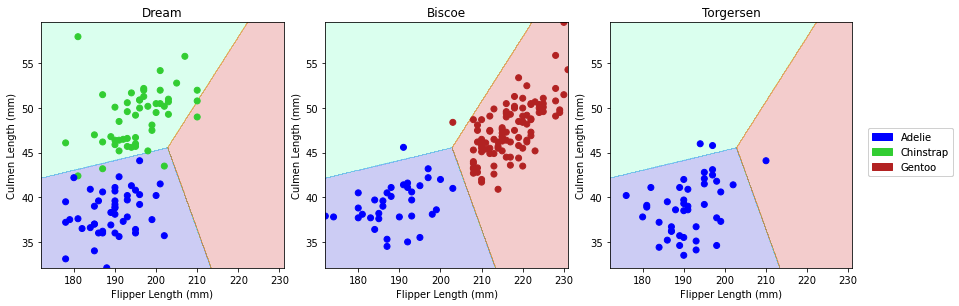

In [13]:
#create object model with the calculated best C value
plot_regions(LR,X_train, y_train)

### Discussing the Mistakes in our Model

Looking at the points against the decision regions, we can see that our logistic model performs pretty well! The large majority of penguins falls within the correct predicted region for species. This is confirmed by our confusion matrix which shows us that the largest values lay on the diagonal entries, indicating the model is correct most of the time. 

Lets examine some of the points that were inaccurately classified. For example, there are a few Chinstrap penguins on Dream Island that were incorrectly classified by our model as Gentoo penguins. In reality, we know there are no Gentoo penguins on Dream Island which is why our model has clearly made a mistake. However, because our models were trained on the entire data set before they were split up by island, the machine recognizes that there are 3 species and classified the penguin the best it could with the data it was trained on. While we could improve the model's predictive power by training on separate islands, we don't want to do that as it can lead to overfitting. So although our model is not perfect, it is pretty good!

## Model 2. Support Vector Machines

In [14]:
from sklearn import svm

### Cross Validation

In [15]:
from sklearn.model_selection import cross_val_score

scores=[]
gamma = np.linspace(.05,5,100)
best_score=-np.inf

for i in gamma:
    SVM=svm.SVC(gamma=i)
    scores.append(cross_val_score(SVM,X_train,y_train,cv=5).mean())
    if scores[-1]>best_score:
        best_score=scores[-1]
        best_gamma=i
        
print(best_gamma, best_score)
print("\nCross validation tells us the best gamma (complexity) value for the Support Vector\nMachine Model is "
      + str(best_gamma)+" which gives an average training score of "+ str(best_score)+".")

0.05 0.9488888888888889

Cross validation tells us the best gamma (complexity) value for the Support Vector
Machine Model is 0.05 which gives an average training score of 0.9488888888888889.


### Confusion Matrix

In [16]:
SVM=svm.SVC(gamma=best_gamma)
SVM.fit(X_train,y_train)
y_test_pred=SVM.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_test_pred)

array([[26,  0,  1],
       [ 3, 14,  1],
       [ 0,  0, 24]])

### Visualization of Decision Regions

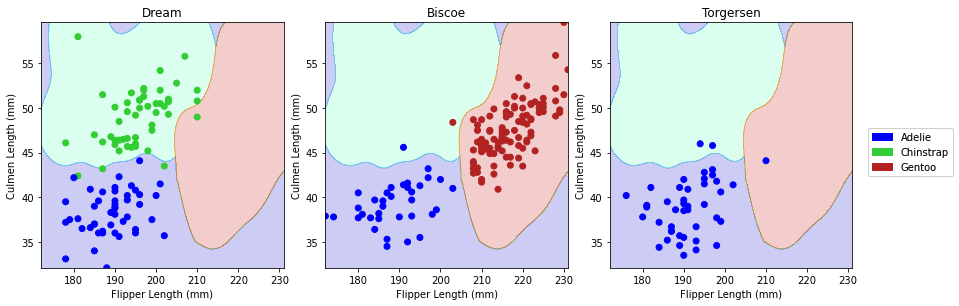

In [17]:
plot_regions(SVM,X_train,y_train)

### Discussing the Mistakes in our Model

The support vector machine model does a pretty good job of correctly classifying Adelie and Gentoo Penguins. However if we examine the decision regions and scatter plot of the points on Dream Island, we see that Chinstrap penguins seem to be the most often misclassified species. Our confusion matrix reflects this fact as well. To explain this discrepancy, we can cite representation bias. 

If we look back on our table from Part 3 (Exploratory Analysis), there are the fewest number of Chinstrap penguins in the dataset. There are only 68 Chinstrap penguins compared to 124 Gentoo and 152 Adelie penguins. Because our model had less information on Chinstrap penguins when it was being trained, it struggled more to correctly identify the Chinstraps relative to the other species.

# 6. Discussion

In [18]:
a=LR.score(X_train[["Flipper Length (mm)","Culmen Length (mm)"]],y_train)
b=LR.score(X_test[["Flipper Length (mm)","Culmen Length (mm)"]],y_test)

print("The training score on X_train and y_train for the Logistic Regression model is " +str(a))
print("The test score on X_test and y_test for the Logistic Regression model is " +str(b))

The training score on X_train and y_train for the Logistic Regression model is 0.967032967032967
The test score on X_test and y_test for the Logistic Regression model is 0.927536231884058


In [19]:
e=SVM.score(X_train[["Flipper Length (mm)","Culmen Length (mm)"]],y_train)
f=SVM.score(X_test[["Flipper Length (mm)","Culmen Length (mm)"]],y_test)

print("The training score on X_train and y_train for the Support Vector Machines model is " +str(e))
print("The test score on X_test and y_test for the Support Vector Machines model is " +str(f))

The training score on X_train and y_train for the Support Vector Machines model is 0.967032967032967
The test score on X_test and y_test for the Support Vector Machines model is 0.927536231884058


## insert discussion for model performance and recommendations

**NOTE DON'T FORGET TO DELETE** rerun the kernel a few times until one of the testing scores is above 95% to get full credit